In [10]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [17]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    #print(command[output_ext])
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    for f in files:
        os.remove(f)
     
 
##### EXAMPLE
"""
if __name__ == '__main__':
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z = axes3d.get_test_data(0.05)
    s = ax.plot_surface(X, Y, Z, cmap=cm.jet)
    plt.axis('off') # remove axes for visual appeal
     
    angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360
 
    # create an animated gif (20ms between frames)
    rotanimate(ax, angles,'movie.gif',delay=20) 
 
    # create a movie with 10 frames per seconds and 'quality' 2000
    rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)
 
    # create an ogv movie
    rotanimate(ax, angles, 'movie.ogv',fps=10)
"""

"\nif __name__ == '__main__':\n \n    fig = plt.figure()\n    ax = fig.add_subplot(111, projection='3d')\n    X, Y, Z = axes3d.get_test_data(0.05)\n    s = ax.plot_surface(X, Y, Z, cmap=cm.jet)\n    plt.axis('off') # remove axes for visual appeal\n     \n    angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360\n \n    # create an animated gif (20ms between frames)\n    rotanimate(ax, angles,'movie.gif',delay=20) \n \n    # create a movie with 10 frames per seconds and 'quality' 2000\n    rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)\n \n    # create an ogv movie\n    rotanimate(ax, angles, 'movie.ogv',fps=10)\n"

In [5]:
points = pd.read_csv("points.csv")

In [6]:
points

,id,x,y,z
0,0,0.107398,0.007118,0.279825
1,1,0.656981,0.659003,0.340232
2,2,0.509271,0.541817,0.099984
3,3,0.383813,0.898919,0.321914
4,4,0.967853,0.804867,0.700821
5,5,0.415096,0.279997,0.644980
6,6,0.251867,0.383471,0.449603
7,7,0.154290,0.104140,0.173923
8,8,0.303685,0.530606,0.769770
9,9,0.099266,0.009279,0.235444


/tmp/ipykernel_45843/3077074596.py:13: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)


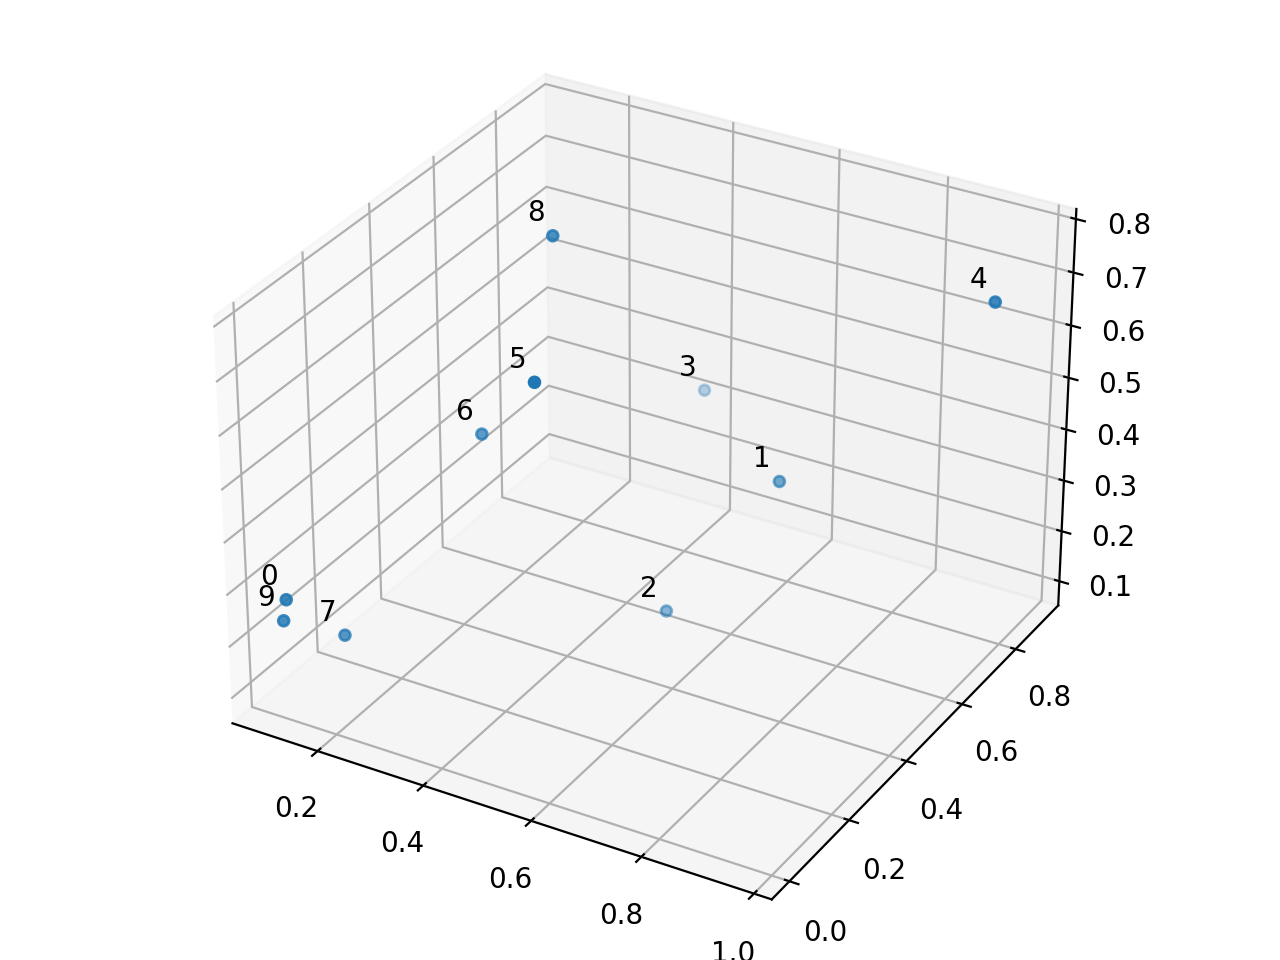

In [37]:
# data: coordinates of nodes and links
xn = points.x
yn = points.y
zn = points.z
#group = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3]
#edges = [(1, 0), (2, 0), (3, 0), (3, 2), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (11, 10), (11, 3), (11, 2), (11, 0), (12, 11), (13, 11), (14, 11), (15, 11), (17, 16), (18, 16), (18, 17), (19, 16), (19, 17), (19, 18)]
xyzn = zip(xn, yn, zn)
#segments = [(xyzn[s], xyzn[t]) for s, t in edges]                

# create figure        
fig = plt.figure(dpi=200)
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
#ax.set_axis_off()

# plot vertices
ax.scatter(xn,yn,zn, marker='o', s = 15)    
# plot edges
# edge_col = Line3DCollection(segments, lw=0.2)
# ax.add_collection3d(edge_col)
# add vertices annotation.
for j, xyz_ in enumerate(xyzn): 
    annotate3D(ax, s=str(j), xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')    
plt.show()

In [20]:
nearlist

,0,9,7,3
0,1,2,3,4
1,2,1,8,3
2,3,0,9,7
3,4,8,0,1
4,5,6,8,3
5,6,5,8,7
6,7,9,0,3
7,8,5,6,2
8,9,0,7,3


In [38]:
angles = np.linspace(0,360,111)[:-1] # Take 80 angles between 0 and 360
rotanimate(ax, angles,'movie.gif',delay=15,repeat=True)

/tmp/ipykernel_45843/3077074596.py:13: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
